 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whales_csv = Path("/Users/joemazzuca/Desktop/UofT_FinTech_Boot_Camp/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
whales_df = pd.read_csv(whales_csv)
whales_df = whales_df.set_index(pd.to_datetime(whales_df["Date"], infer_datetime_format = True))
whales_df = whales_df.drop(columns = ["Date"])
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_df.dropna(inplace = True)
whales_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csv = Path("/Users/joemazzuca/Desktop/UofT_FinTech_Boot_Camp/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv)
algo_df = algo_df.set_index(pd.to_datetime(algo_df["Date"], infer_datetime_format = True))
algo_df = algo_df.drop(columns = ["Date"])
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
tsx60_csv = Path("/Users/joemazzuca/Desktop/UofT_FinTech_Boot_Camp/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp_tsx_history.csv")
tsx60_df = pd.read_csv(tsx60_csv)
tsx60_df = tsx60_df.set_index(pd.to_datetime(tsx60_df["Date"], infer_datetime_format = True))
tsx60_df = tsx60_df.drop(columns = ["Date"])
tsx60_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
tsx60_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
tsx60_df["Close"] = tsx60_df["Close"].str.replace("$", "")
tsx60_df["Close"] = tsx60_df["Close"].str.replace(",", "")
tsx60_df["Close"] = tsx60_df["Close"].astype("float")
tsx60_df["Close"]

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64

In [11]:
# Calculate Daily Returns
tsx60_daily_returns = tsx60_df.pct_change()
tsx60_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
tsx60_daily_returns.dropna(inplace = True)
tsx60_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
tsx60_daily_returns.columns = ["S&P/TSX 60"]
tsx60_daily_returns.head()

,S&P/TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([whales_df, algo_df, tsx60_daily_returns], axis = "columns", join = "inner")
combined_data.sort_index(inplace = True)
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P/TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

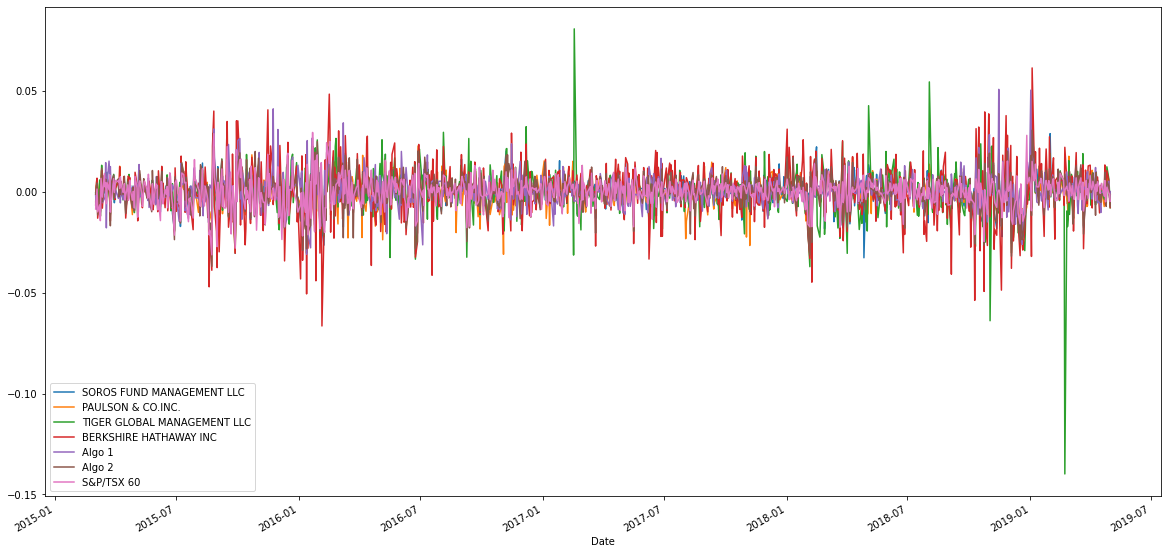

In [15]:
# Plot daily returns of all portfolios
combined_data.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

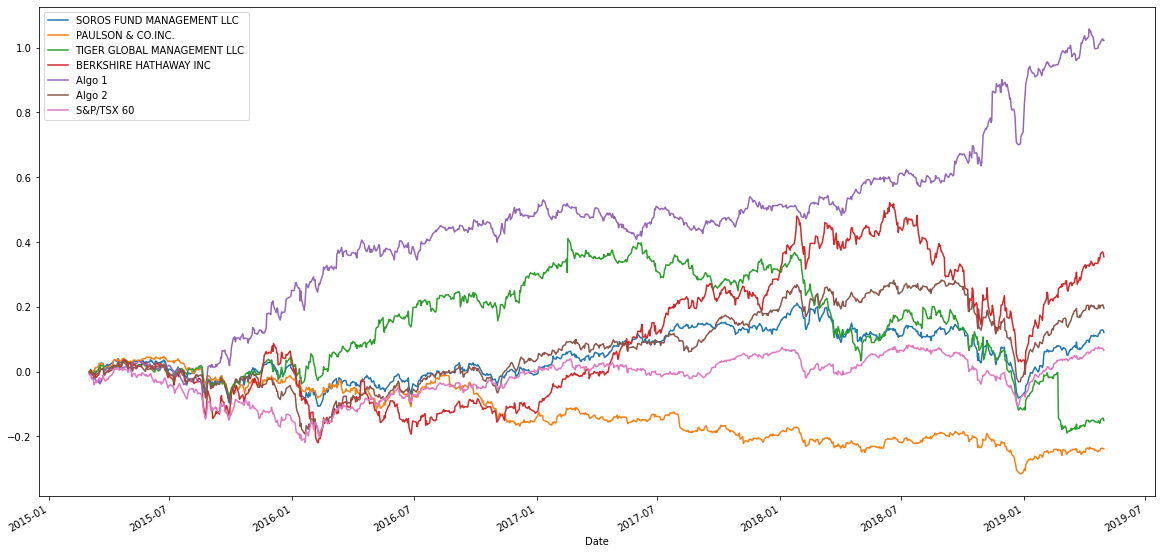

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

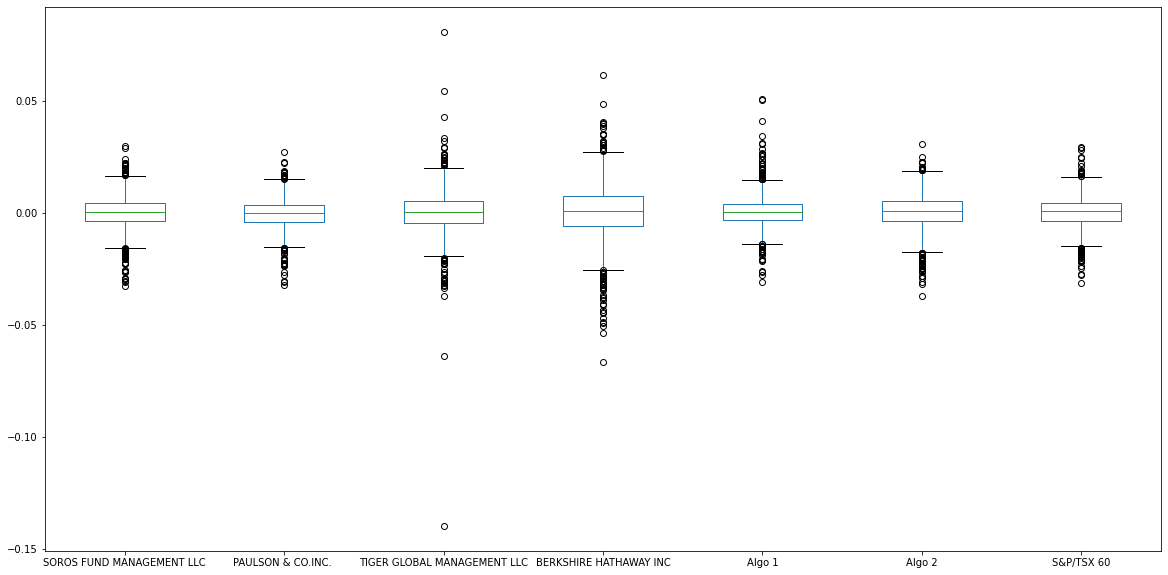

In [17]:
# Box plot to visually show risk
combined_data.plot.box(figsize = (20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
standard_deviation = np.std(combined_data)
standard_deviation

SOROS FUND MANAGEMENT LLC      0.007824
PAULSON & CO.INC.              0.006979
TIGER GLOBAL MANAGEMENT LLC    0.010877
BERKSHIRE HATHAWAY INC         0.012819
Algo 1                         0.007585
Algo 2                         0.008322
S&P/TSX 60                     0.007031
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx60_std = np.std(combined_data["S&P/TSX 60"])
print(f"The S&P/TSX 60 has a daily standard deviation of {tsx60_std}")
print()
# Determine which portfolios are riskier than the S&P TSX 60
standard_deviation = standard_deviation.sort_values(ascending = False)
print(standard_deviation)
print()
print("All portfolios that are listed above the S&P/TSX 60 in the list are riskier.")

The S&P/TSX 60 has a daily standard deviation of 0.007030748954816322

BERKSHIRE HATHAWAY INC         0.012819
TIGER GLOBAL MANAGEMENT LLC    0.010877
Algo 2                         0.008322
SOROS FUND MANAGEMENT LLC      0.007824
Algo 1                         0.007585
S&P/TSX 60                     0.007031
PAULSON & CO.INC.              0.006979
dtype: float64

All portfolios that are listed above the S&P/TSX 60 in the list are riskier.


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = standard_deviation * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203500
TIGER GLOBAL MANAGEMENT LLC    0.172675
Algo 2                         0.132113
SOROS FUND MANAGEMENT LLC      0.124199
Algo 1                         0.120411
S&P/TSX 60                     0.111610
PAULSON & CO.INC.              0.110787
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

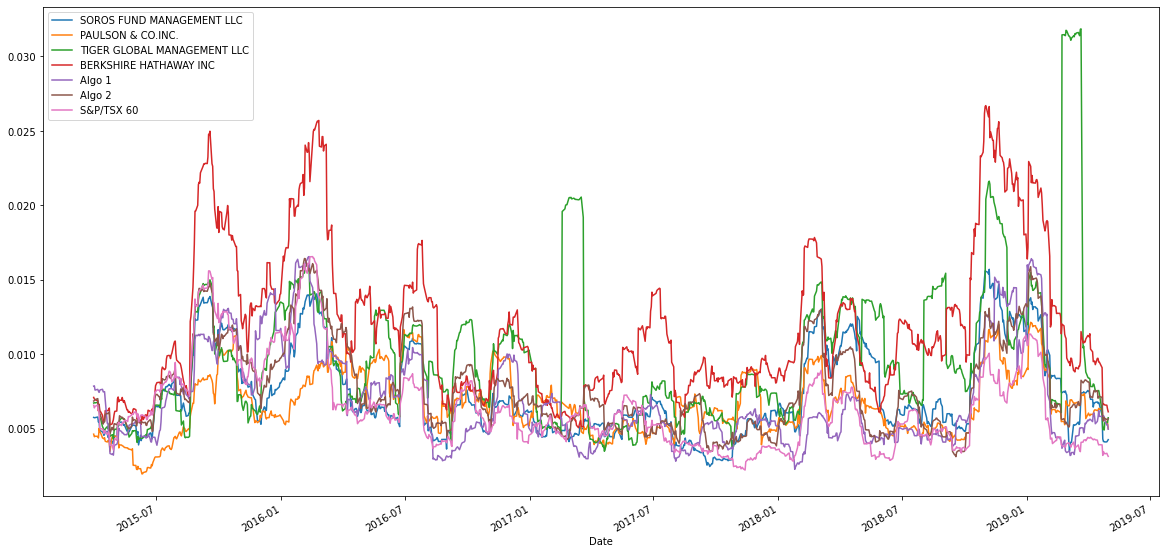

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
twty_one_rolling_std = combined_data.rolling(window = 21).std()
# Plot the rolling standard deviation
twty_one_rolling_std.plot(figsize = (20,10))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = combined_data.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P/TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P/TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

The beta of the Algo 2 portfolio is 0.87.



<AxesSubplot:title={'center':'Rolling 21-Day Beta of Algo 2 Portfolio'}, xlabel='Date'>

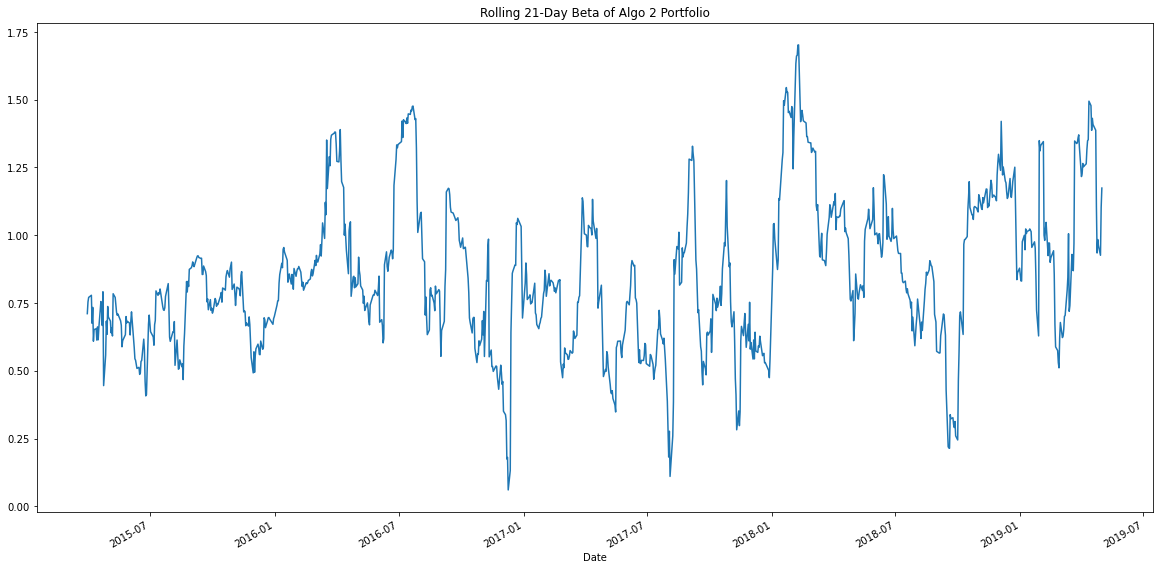

In [23]:
# Calculate covariance of a single portfolio
covariance_algo2_to_tsx60 = combined_data["Algo 2"].cov(combined_data["S&P/TSX 60"])
# Calculate the variance of the S&P/TSX60
var_tsx60 = combined_data["S&P/TSX 60"].var()
# Computing beta
beta_algo2 = round(covariance_algo2_to_tsx60 / var_tsx60, 2)
print(f"The beta of the Algo 2 portfolio is {beta_algo2}.")
print()
# Plot beta trend
rolling_covariance_algo2_vs_tsx60 = combined_data["Algo 2"].rolling(window = 21).cov(combined_data["S&P/TSX 60"])
rolling_variance_tsx60 = combined_data["S&P/TSX 60"].rolling(window = 21).var()
rolling_beta = rolling_covariance_algo2_vs_tsx60 / rolling_variance_tsx60
rolling_beta.plot(figsize = (20,10), title = "Rolling 21-Day Beta of Algo 2 Portfolio")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [24]:
# Use `ewm` to calculate the rolling window
exp_weight_avg = combined_data.ewm(halflife = 21).mean()
exp_weight_avg

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P/TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436
...,...,...,...,...,...,...,...
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / annualized_std
sharpe_ratios

Algo 1                         1.492239
Algo 2                         0.397010
BERKSHIRE HATHAWAY INC         0.467272
PAULSON & CO.INC.             -0.547860
S&P/TSX 60                     0.195645
SOROS FUND MANAGEMENT LLC      0.286848
TIGER GLOBAL MANAGEMENT LLC   -0.144526
dtype: float64

<AxesSubplot:>

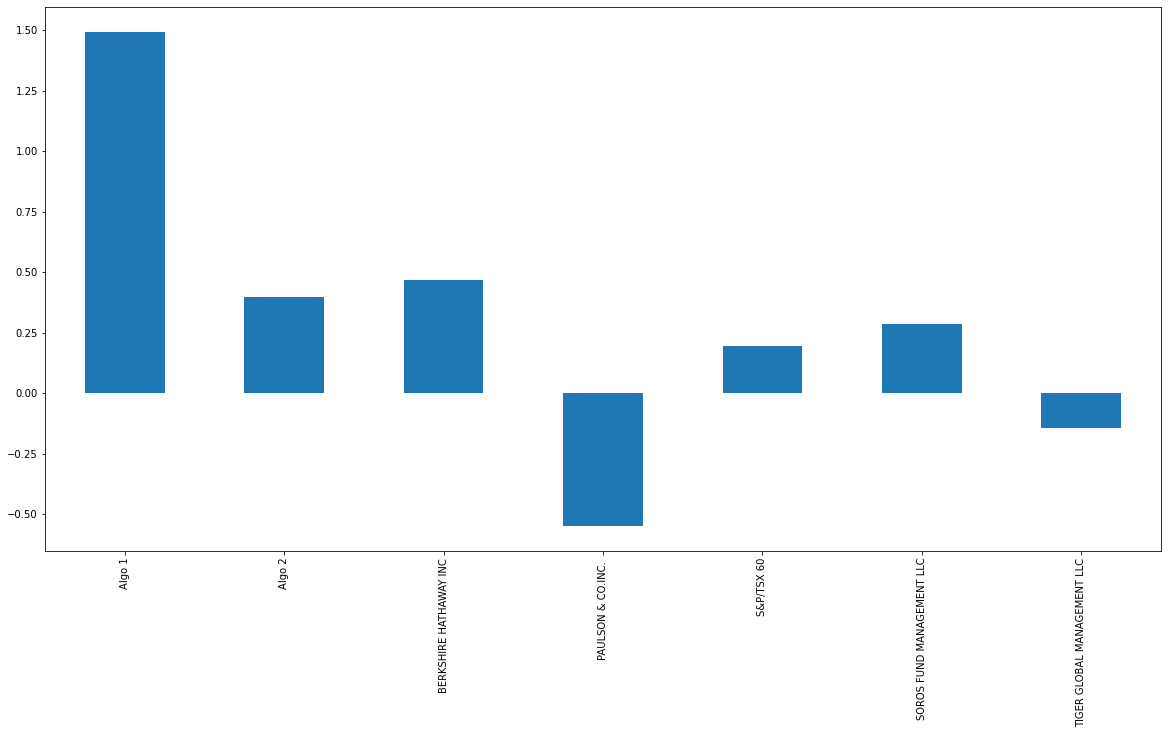

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize = (20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 portfolio will outperform both the market and the whale portfolios. Algo 2 portfolio will outperform the market and every whale portfolio except Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [27]:
# Reading data from 1st stock
shop_path = Path("/Users/joemazzuca/Desktop/UofT_FinTech_Boot_Camp/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/shop_historical.csv")
shop_csv = pd.read_csv(shop_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
shop_csv = shop_csv.sort_index()
shop_csv.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [28]:
# Reading data from 2nd stock
otex_path = Path("/Users/joemazzuca/Desktop/UofT_FinTech_Boot_Camp/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/otex_historical.csv")
otex_csv = pd.read_csv(otex_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
otex_csv = otex_csv.sort_index()
otex_csv.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [29]:
# Reading data from 3rd stock
l_path = Path("/Users/joemazzuca/Desktop/UofT_FinTech_Boot_Camp/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/l_historical.csv")
l_csv = pd.read_csv(l_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
l_csv = l_csv.sort_index()
l_csv.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [30]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([shop_csv, otex_csv, l_csv], axis = "rows", join = "inner")
combined_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [31]:
# Reset Date index
combined_df = combined_df.reset_index()
combined_df

,Date,Symbol,Close
0,2018-01-02,SHOP,132.06
1,2018-01-03,SHOP,135.15
2,2018-01-04,SHOP,137.46
3,2018-01-05,SHOP,137.26
4,2018-01-08,SHOP,139.51
...,...,...,...
1498,2019-12-20,L,67.90
1499,2019-12-23,L,67.68
1500,2019-12-24,L,67.67
1501,2019-12-27,L,67.78


In [32]:
# Reorganize portfolio data by having a column per symbol
combined_df = combined_df.pivot_table(values = "Close", index = "Date", columns = "Symbol")
combined_df

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [33]:
# Calculate daily returns
combined_daily_returns = combined_df.pct_change()
# Drop NAs
combined_daily_returns.dropna(inplace = True)
# Display sample data
combined_daily_returns

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = combined_daily_returns.dot(weights)
# Display sample data
portfolio_return.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
combined_data["MAZZUCA FUND"] = portfolio_return
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P/TSX 60,MAZZUCA FUND
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_data.dropna(inplace = True)
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P/TSX 60,MAZZUCA FUND
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
annual_std_2 = np.std(combined_data) * np.sqrt(252)
annual_std_2

SOROS FUND MANAGEMENT LLC      0.145452
PAULSON & CO.INC.              0.114169
TIGER GLOBAL MANAGEMENT LLC    0.219497
BERKSHIRE HATHAWAY INC         0.227098
Algo 1                         0.119845
Algo 2                         0.137454
S&P/TSX 60                     0.098970
MAZZUCA FUND                   0.224003
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

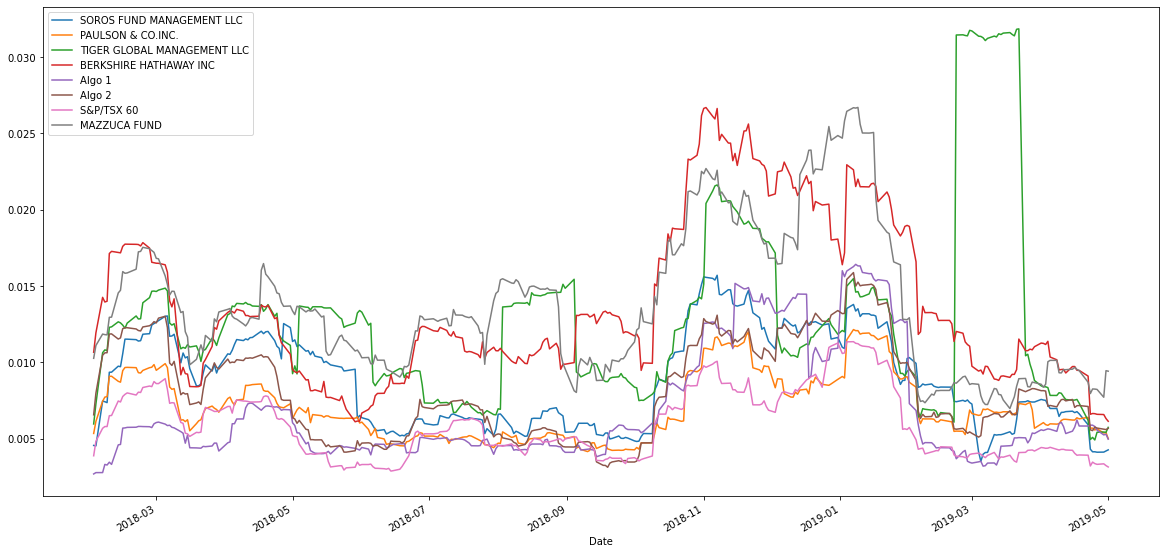

In [38]:
# Calculate rolling standard deviation
combined_rolling_std = combined_data.rolling(window = 21).std()
# Plot rolling standard deviation
combined_rolling_std.plot(figsize = (20,10))

### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation
combined_correlation = combined_data.corr()
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P/TSX 60,MAZZUCA FUND
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P/TSX 60,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
MAZZUCA FUND,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

The beta of the MAZZUCA FUND is 1.03.



<AxesSubplot:title={'center':'Rolling 21-Day Beta of MAZZUCA FUND'}, xlabel='Date'>

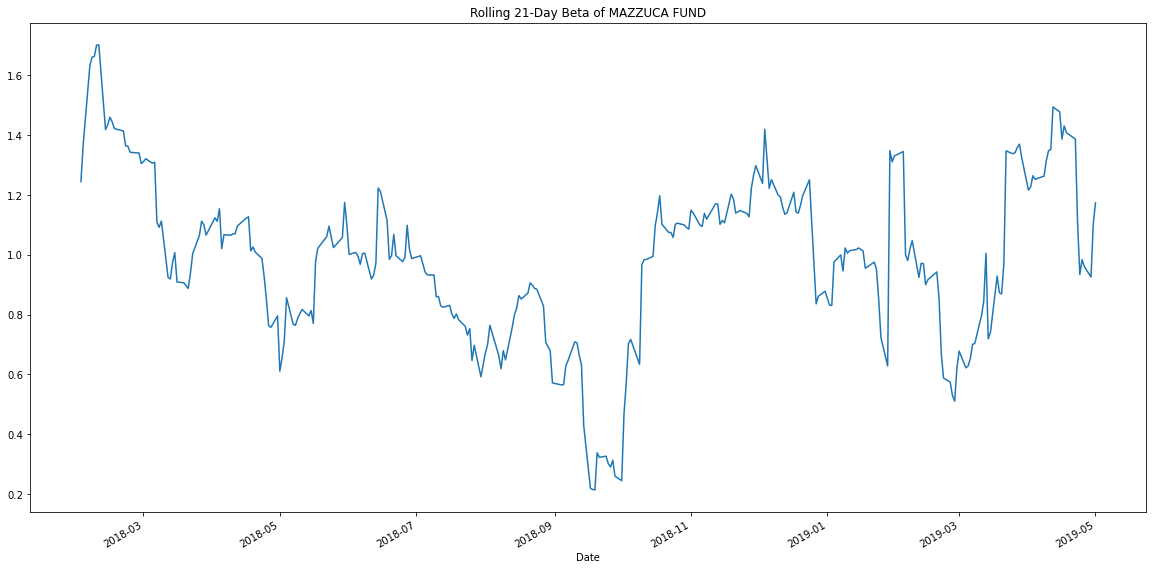

In [40]:
# Calculate and plot Beta
covariance_mazzuca_to_tsx60 = combined_data["MAZZUCA FUND"].cov(combined_data["S&P/TSX 60"])

beta_mazzuca = round(covariance_mazzuca_to_tsx60 / var_tsx60, 2)
print(f"The beta of the MAZZUCA FUND is {beta_mazzuca}.")
print()
# Plot beta trend
rolling_covariance_mazzuca_vs_tsx60 = combined_data["Algo 2"].rolling(window = 21).cov(combined_data["S&P/TSX 60"])
rolling_beta_mazzuca = rolling_covariance_mazzuca_vs_tsx60 / rolling_variance_tsx60
rolling_beta_mazzuca.plot(figsize = (20,10), title = "Rolling 21-Day Beta of MAZZUCA FUND")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
combined_sharpe_ratios = (combined_data.mean() * 252) / annual_std_2
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088331
PAULSON & CO.INC.             -0.396887
TIGER GLOBAL MANAGEMENT LLC   -1.393739
BERKSHIRE HATHAWAY INC         0.196206
Algo 1                         1.904366
Algo 2                         0.021427
S&P/TSX 60                     0.034704
MAZZUCA FUND                   1.566937
dtype: float64

<AxesSubplot:>

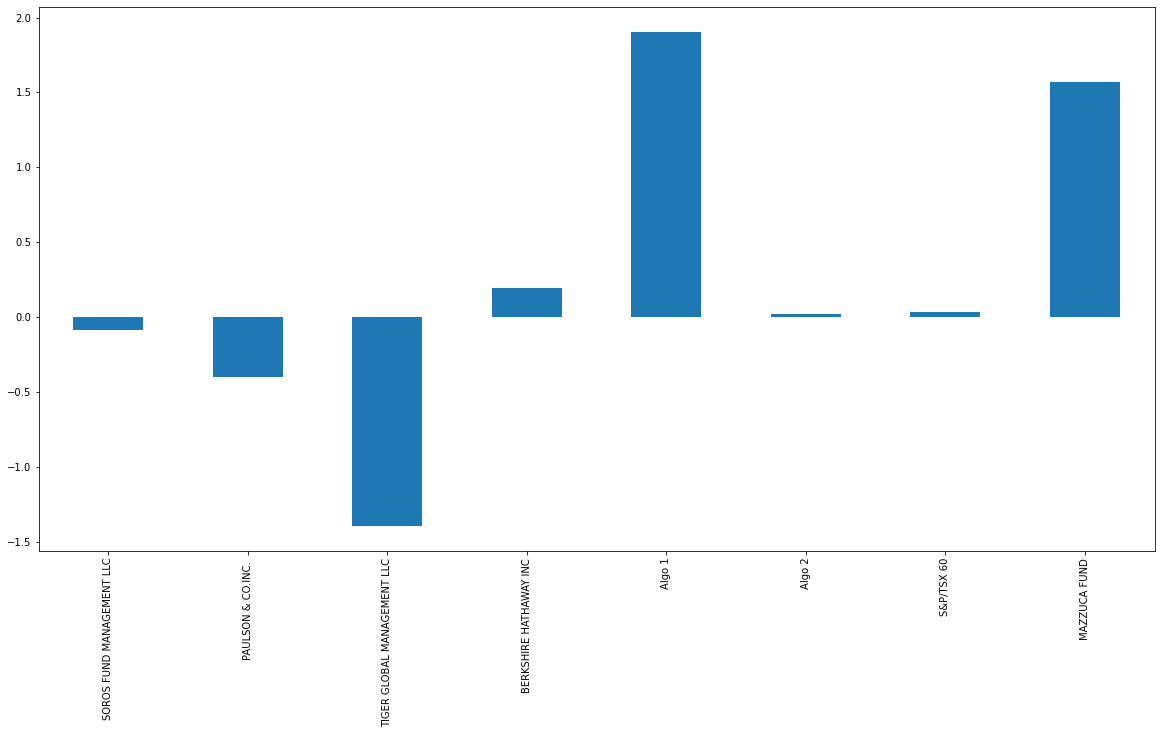

In [42]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind = "bar", figsize = (20,10))

### How does your portfolio do?

My portfolio outperforms all portfolios on a risk adjusted basis except for the Algo 1 portfolio.